In [1]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [2]:
data = pd.read_csv('twitter_train.csv')
data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [3]:
data = data[['sentiment', 'text','selected_text']]
data.head()

,sentiment,text,selected_text
0,neutral,"I`d have responded, if I were going","I`d have responded, if I were going"
1,negative,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD
2,negative,my boss is bullying me...,bullying me
3,negative,what interview! leave me alone,leave me alone
4,negative,"Sons of ****, why couldn`t they put them on t...","Sons of ****,"


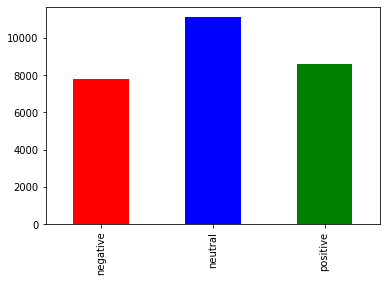

In [4]:
data['sentiment'].value_counts().sort_index().plot.bar(color=list('rbg'))

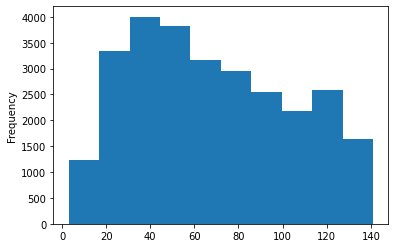

In [5]:
data['text'].str.len().plot.hist()

In [6]:
data['text'] = data['text'].apply(lambda x: str(x).lower()) 
data['text'] = data['text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x))
data['text'].head()

0                   i`d have responded if i were going
1           sooo sad i will miss you here in san diego
2                               my boss is bullying me
3                        what interview leave me alone
4     sons of  why couldn`t they put them on the re...
Name: text, dtype: object

In [7]:
data['selected_text'] = data['selected_text'].apply(lambda x: str(x).lower()) 
data['selected_text'] = data['selected_text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x))
data['selected_text'].head()

0    i`d have responded if i were going
1                              sooo sad
2                           bullying me
3                        leave me alone
4                              sons of 
Name: selected_text, dtype: object

In [8]:
tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(data['text'].values)

X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X) # padding our text vector so they all have the same length
X[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    1,  171,   18,   71,    1,  146,
          47],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,  413,  116,    1,   60,   91,    7,   90,   10, 1468,
        2224],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    5, 1312,    9,
          17],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,   50, 1122,  340,   17,
         497],
       [   0,    0,    0,    0,    0,    0,    0,   

In [11]:
model = Sequential()
model.add(Embedding(5000, 250, input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(250, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(250, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(34, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 34, 250)           1250000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 34, 250)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 34, 250)           501000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 250)               501000    
_________________________________________________________________
dense_2 (Dense)              (None, 34)                8534      
Total params: 2,260,534
Trainable params: 2,260,534
Non-trainable params: 0
_________________________________________________________________


In [13]:
tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(data['selected_text'].values)

y = tokenizer.texts_to_sequences(data['selected_text'].values)
y = pad_sequences(y) 
y[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    1,  147,   19,   73,    1,  154,
          46],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  415,
          71],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          15],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,  326,   15,
         543],
       [   0,    0,    0,    0,    0,    0,    0,   

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
batch_size = 34
epochs = 20
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/4
 - 168s - loss: 92726.6939 - accuracy: 0.4684
Epoch 2/4
 - 171s - loss: 145770.1112 - accuracy: 0.4684
Epoch 3/4
 - 171s - loss: 198349.3949 - accuracy: 0.4684
Epoch 4/4
 - 172s - loss: 252843.4464 - accuracy: 0.4684


In [17]:
predictions = model.predict(X_test)
[print(data['text'][i], predictions[i], y_test[i]) for i in range(0, 5)]

 i`d have responded if i were going [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 8.2490491e-34
 1.4262075e-30 1.5345245e-27 4.3220211e-21 1.0000000e+00] [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 100]
 sooo sad i will miss you here in san diego [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+0

[None, None, None, None, None]